In [29]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from lightgbm import LGBMClassifier

import lightgbm as lgb

from catboost import CatBoostClassifier

import timeit

In [23]:
df = pd.read_csv("data/binary_data.csv")
X = df.drop(['id', 'traffic_type'], axis=1)
y = df['traffic_type']

kfold = KFold(n_splits=5)
splits = list(kfold.split(X, y))

In [3]:
# Logistic regression
start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

for train, test in tqdm(splits):
    logreg = LogisticRegression()
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]

    logreg.fit(X_train, y_train)
    pred_values = logreg.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)

elapsed = timeit.default_timer() - start_time

print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


---Run time is 1.5868113430001358 seconds ---

Accuracy of each fold: 
 [0.62346588119784, 0.5214640266186658, 0.7445044455353733, 0.7295587192494409, 0.5089183439698903]
Avg accuracy: 0.6255822833142421
Std of accuracy : 
0.09940738923814706
confusion matrix: 
[[31717 12717]
 [21604 25627]]
classification report: 
              precision    recall  f1-score   support

           0       0.59      0.71      0.65     44434
           1       0.67      0.54      0.60     47231

    accuracy                           0.63     91665
   macro avg       0.63      0.63      0.62     91665
weighted avg       0.63      0.63      0.62     91665

0.7138002430571184
0.5425885541275857
0.594831304739221
0.64890798424633


In [4]:
# Linear discriminant analysis
start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

for train, test in tqdm(splits):
    lda = LinearDiscriminantAnalysis()
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]

    lda.fit(X_train, y_train)
    pred_values = lda.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)

elapsed = timeit.default_timer() - start_time

print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


---Run time is 6.0572908210001515 seconds ---

Accuracy of each fold: 
 [1.0, 1.0, 0.9755631920580374, 1.0, 1.0]
Avg accuracy: 0.9951126384116075
Std of accuracy : 
0.009774723176785027
confusion matrix: 
[[43986   448]
 [    0 47231]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44434
           1       0.99      1.00      1.00     47231

    accuracy                           1.00     91665
   macro avg       1.00      0.99      1.00     91665
weighted avg       1.00      1.00      1.00     91665

0.9899176306432012
1.0
1.0
0.994933273015155


In [5]:
# Support vector classifier
start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

for train, test in tqdm(splits):
    svc = LinearSVC(max_iter=5000, dual=False)
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]

    svc.fit(X_train, y_train)
    pred_values = svc.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)

elapsed = timeit.default_timer() - start_time

print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

100%|██████████| 5/5 [00:01<00:00,  4.75it/s]


---Run time is 1.0636569829998734 seconds ---

Accuracy of each fold: 
 [0.62346588119784, 0.5214640266186658, 0.7445044455353733, 0.7295587192494409, 0.5089183439698903]
Avg accuracy: 0.6255822833142421
Std of accuracy : 
0.09940738923814706
confusion matrix: 
[[31717 12717]
 [21604 25627]]
classification report: 
              precision    recall  f1-score   support

           0       0.59      0.71      0.65     44434
           1       0.67      0.54      0.60     47231

    accuracy                           0.63     91665
   macro avg       0.63      0.63      0.62     91665
weighted avg       0.63      0.63      0.62     91665

0.7138002430571184
0.5425885541275857
0.594831304739221
0.64890798424633


  0%|          | 0/5 [00:00<?, ?it/s]

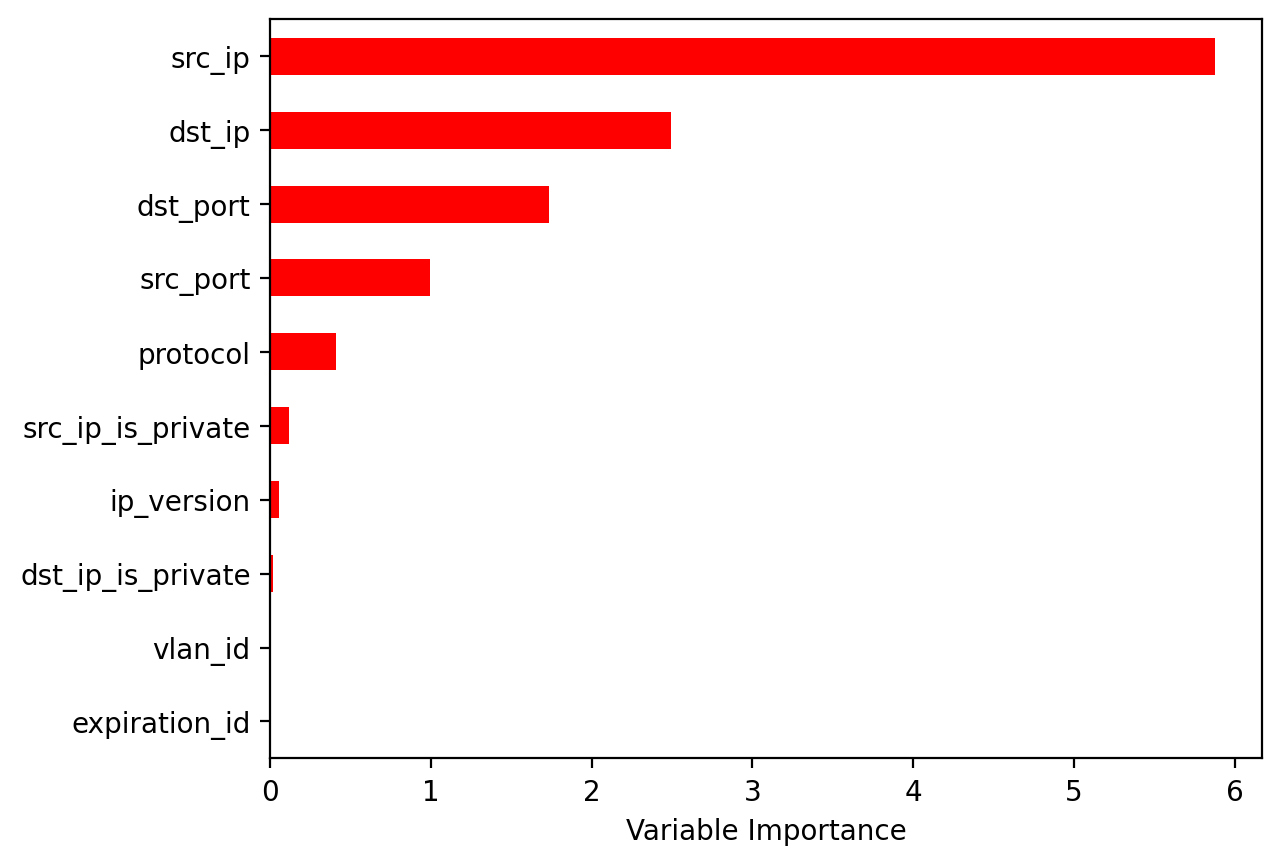

 20%|██        | 1/5 [00:03<00:13,  3.36s/it]

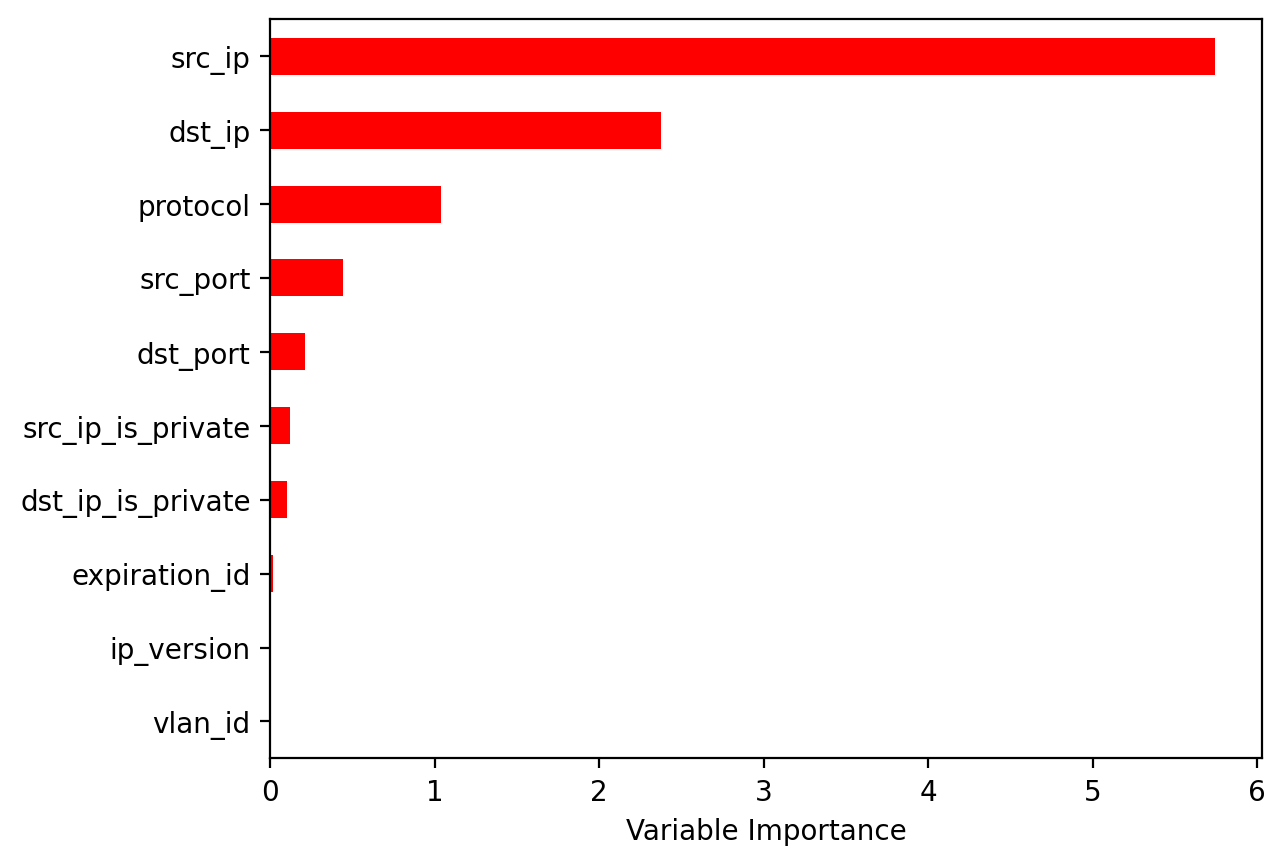

 40%|████      | 2/5 [00:06<00:10,  3.34s/it]

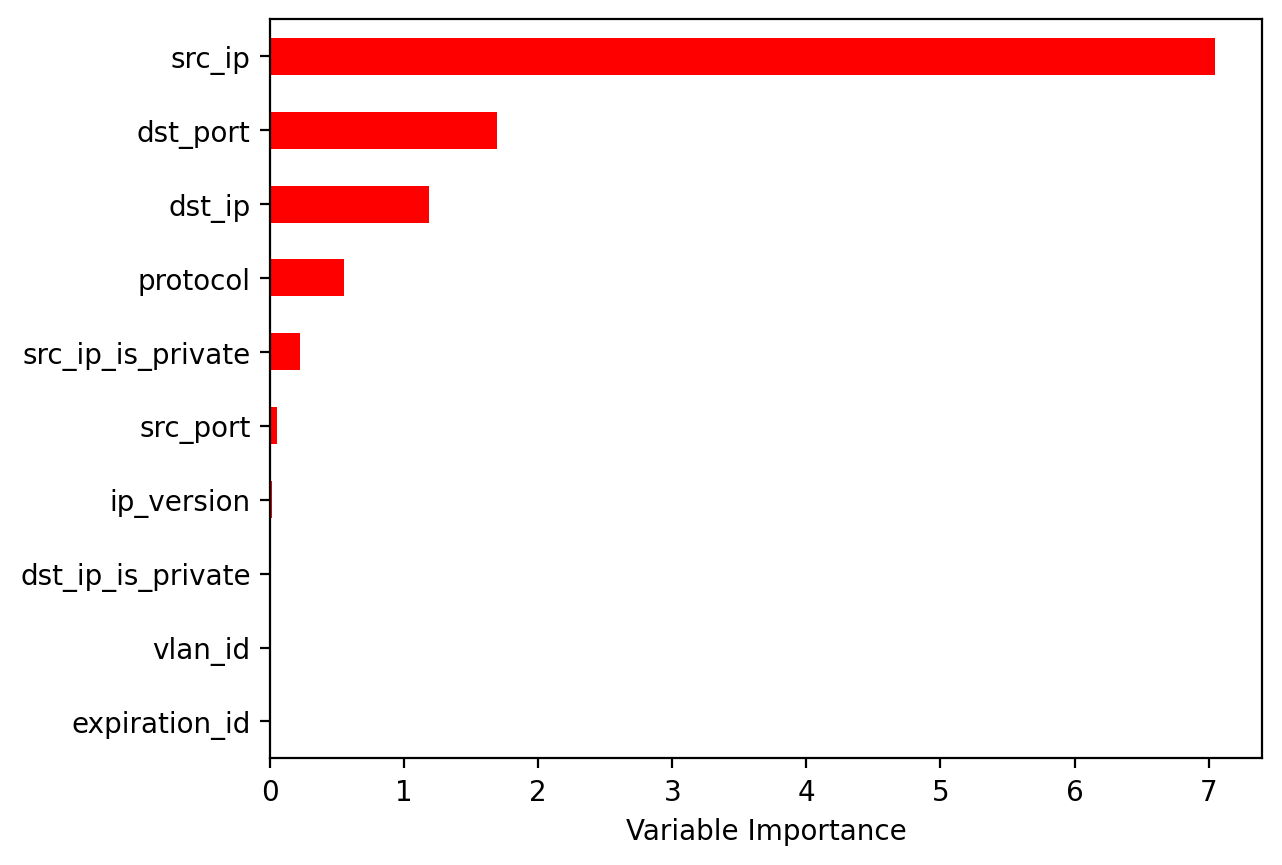

 60%|██████    | 3/5 [00:10<00:06,  3.42s/it]

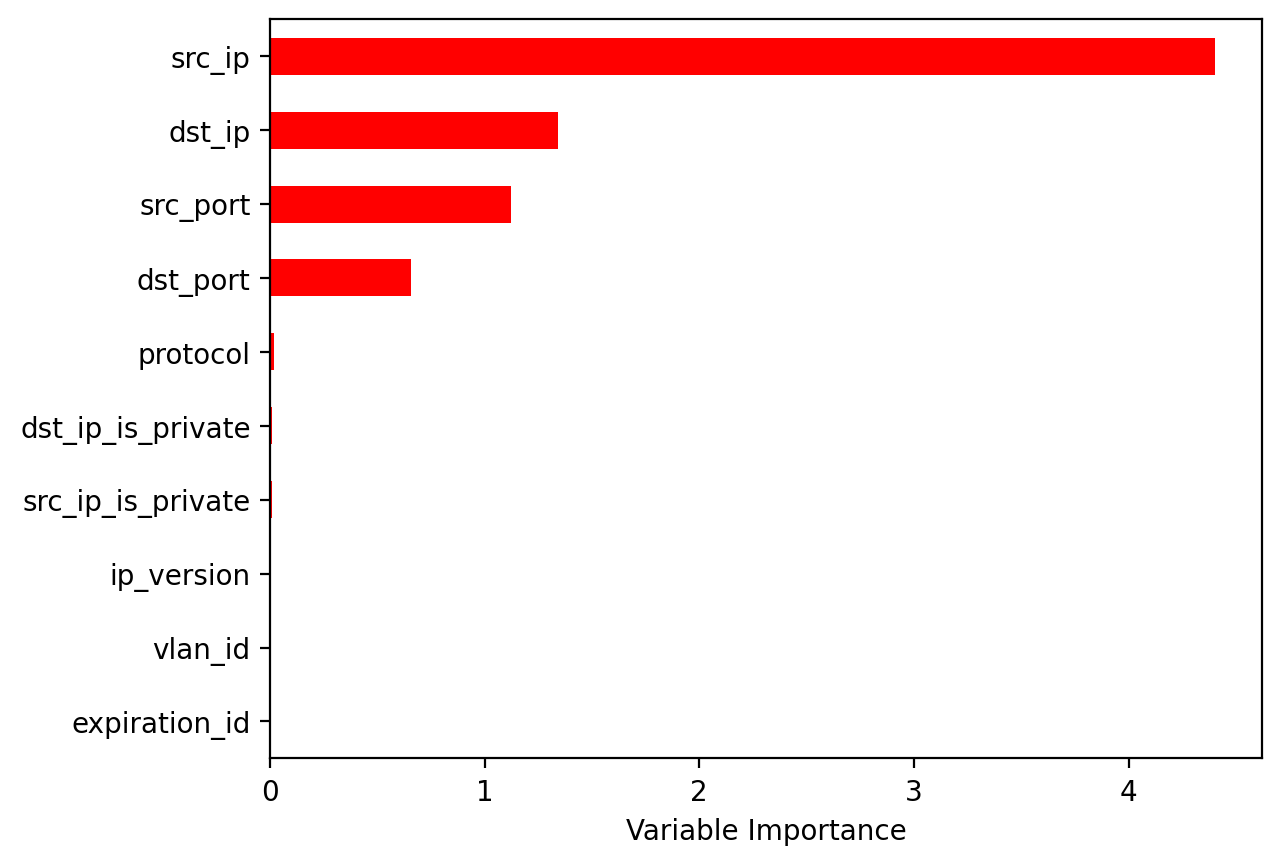

 80%|████████  | 4/5 [00:13<00:03,  3.43s/it]

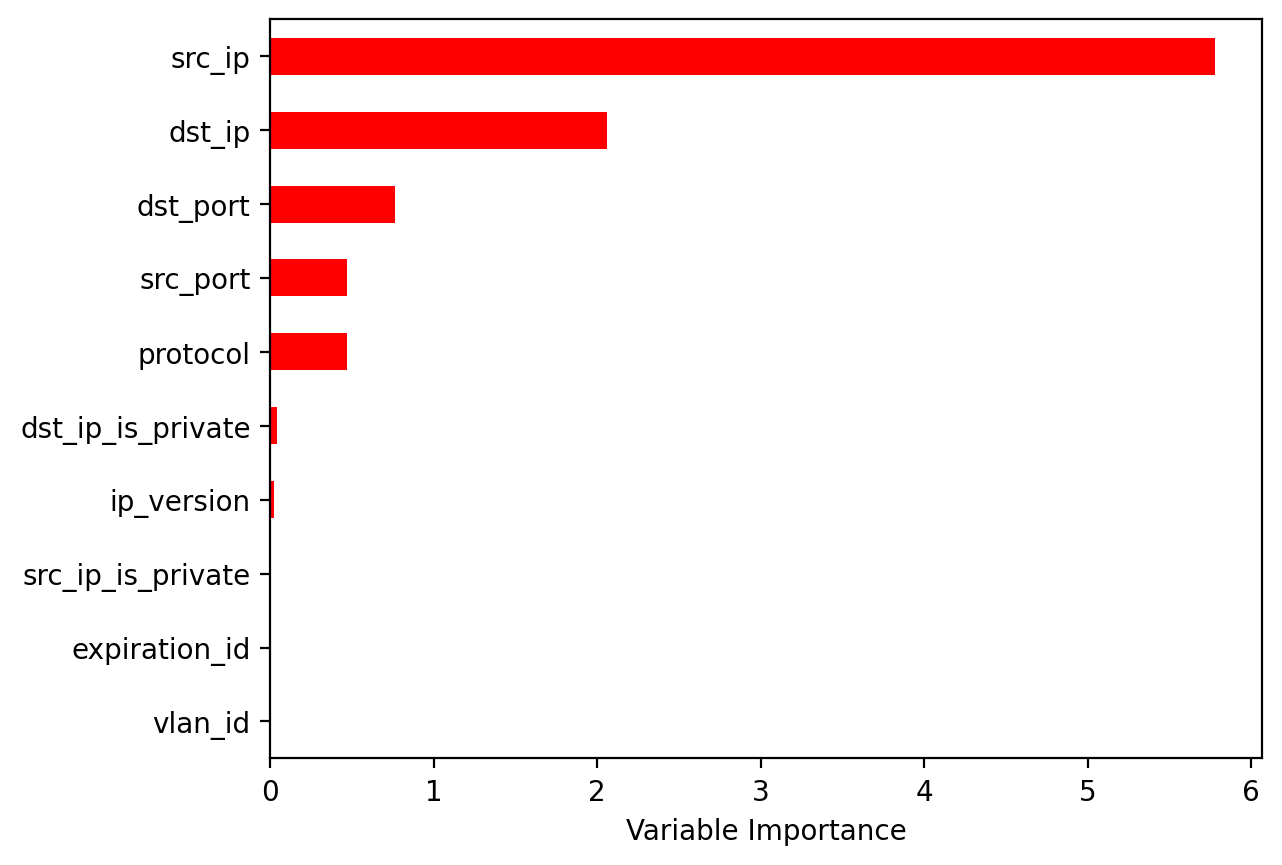

100%|██████████| 5/5 [00:16<00:00,  3.37s/it]

---Run time is 16.84958499200002 seconds ---

Accuracy of each fold: 
 [1.0, 1.0, 1.0, 1.0, 1.0]
Avg accuracy: 1.0
Std of accuracy : 
0.0
confusion matrix: 
[[44434     0]
 [    0 47231]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44434
           1       1.00      1.00      1.00     47231

    accuracy                           1.00     91665
   macro avg       1.00      1.00      1.00     91665
weighted avg       1.00      1.00      1.00     91665

1.0
1.0
1.0
1.0


In [6]:
# Random Forest
start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

for train, test in tqdm(splits):
    rf = RandomForestClassifier(n_estimators=100, max_depth=10)
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]

    rf.fit(X_train, y_train)
    pred_values = rf.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)

    Importance = pd.DataFrame({'Importance':(rf.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    plt.show()

elapsed = timeit.default_timer() - start_time

print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

In [30]:
# AdaBoost
start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

for train, test in tqdm(splits):
    adaBoost = AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, random_state=2)
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]

    adaBoost.fit(X_train, y_train)
    pred_values = adaBoost.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])) 
    Output.extend(pred_values)

elapsed = timeit.default_timer() - start_time

print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print("confusion matrix: ")

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

[1. 1. 1. 1. 1.]


100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

---Run time is 2.21251305099986 seconds ---

Accuracy of each fold: 
 [1.0, 1.0, 1.0, 1.0, 1.0]
Avg accuracy: 1.0
Std of accuracy : 
0.0
confusion matrix: 
[[44434     0]
 [    0 47231]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44434
           1       1.00      1.00      1.00     47231

    accuracy                           1.00     91665
   macro avg       1.00      1.00      1.00     91665
weighted avg       1.00      1.00      1.00     91665

1.0
1.0
1.0
1.0


1.7.1


  0%|          | 0/5 [00:00<?, ?it/s]/home/ari/anaconda3/envs/ccd/lib/python3.10/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
 20%|██        | 1/5 [00:01<00:04,  1.16s/it]/home/ari/anaconda3/envs/ccd/lib/python3.10/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


roc_auc_score: 1.0


 40%|████      | 2/5 [00:02<00:03,  1.10s/it]/home/ari/anaconda3/envs/ccd/lib/python3.10/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


roc_auc_score: 1.0


 60%|██████    | 3/5 [00:03<00:02,  1.07s/it]/home/ari/anaconda3/envs/ccd/lib/python3.10/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


roc_auc_score: 1.0


 80%|████████  | 4/5 [00:04<00:00,  1.03it/s]/home/ari/anaconda3/envs/ccd/lib/python3.10/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


roc_auc_score: 1.0


100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


roc_auc_score: 1.0
---Run time is 4.869355245999941 seconds ---

Accuracy of each fold: 
 [0.8797796323569519, 1.0, 1.0, 1.0, 1.0]

Avg accuracy : 
0.9759559264713904

Std of accuracy : 
0.048088147057219234
[[42230  2204]
 [    0 47231]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     44434
           1       0.96      1.00      0.98     47231

    accuracy                           0.98     91665
   macro avg       0.98      0.98      0.98     91665
weighted avg       0.98      0.98      0.98     91665

0.9503983436107485
1.0
1.0
0.9745684482599464


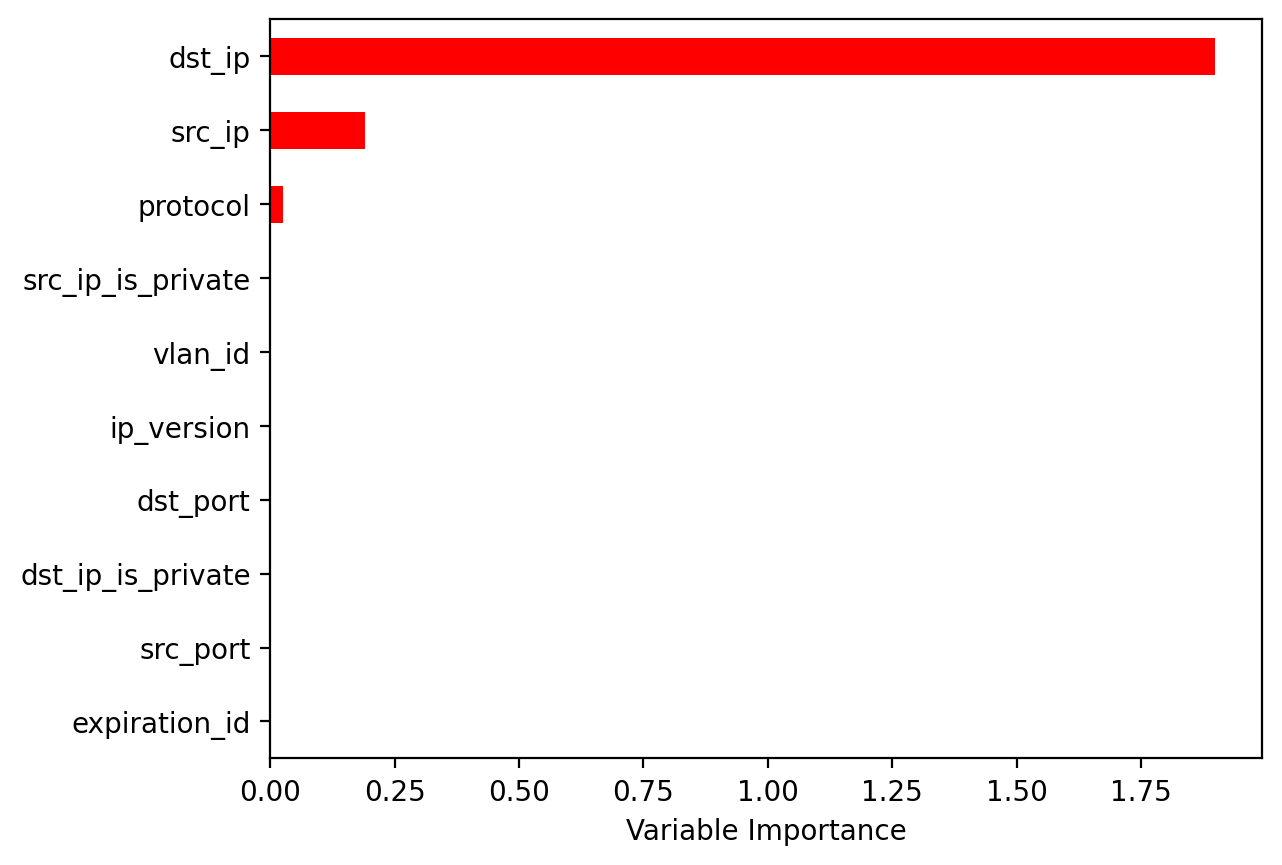

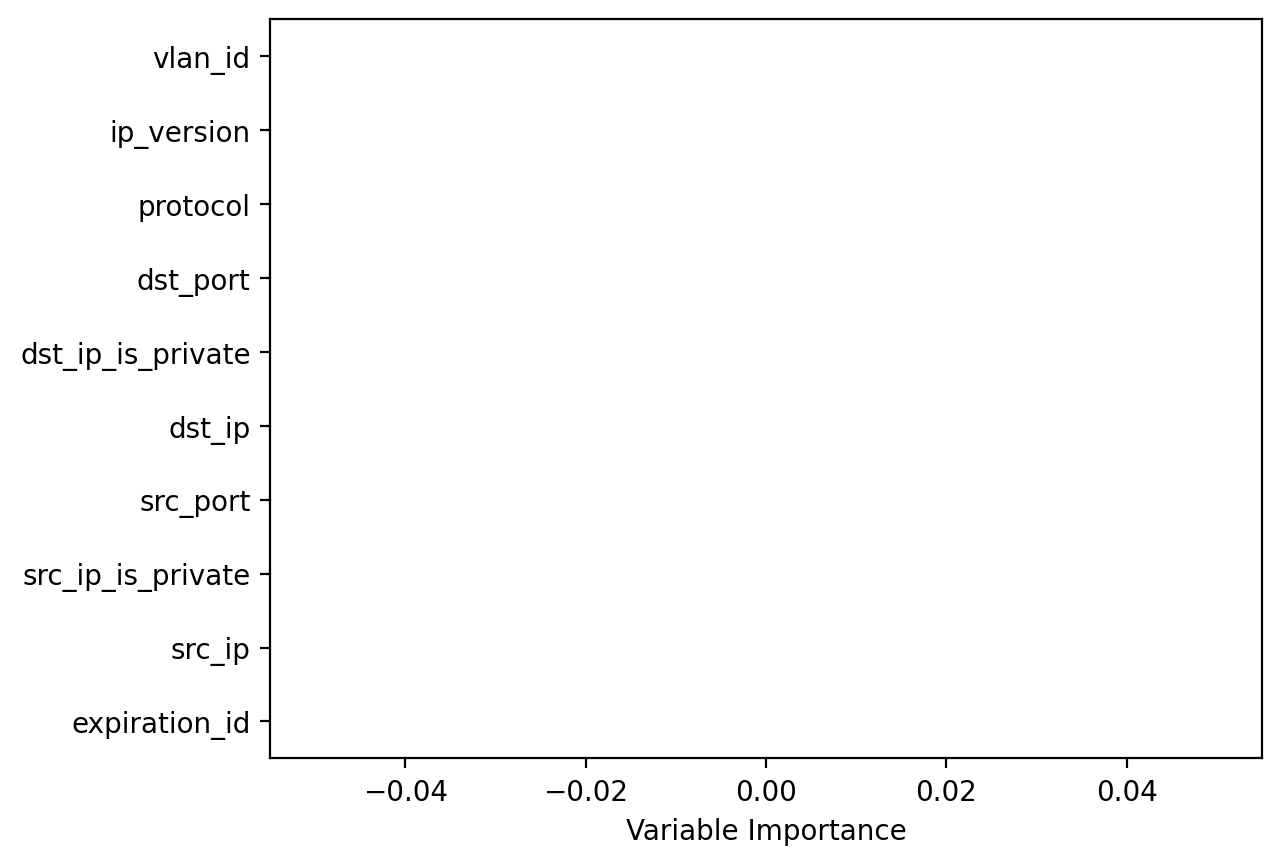

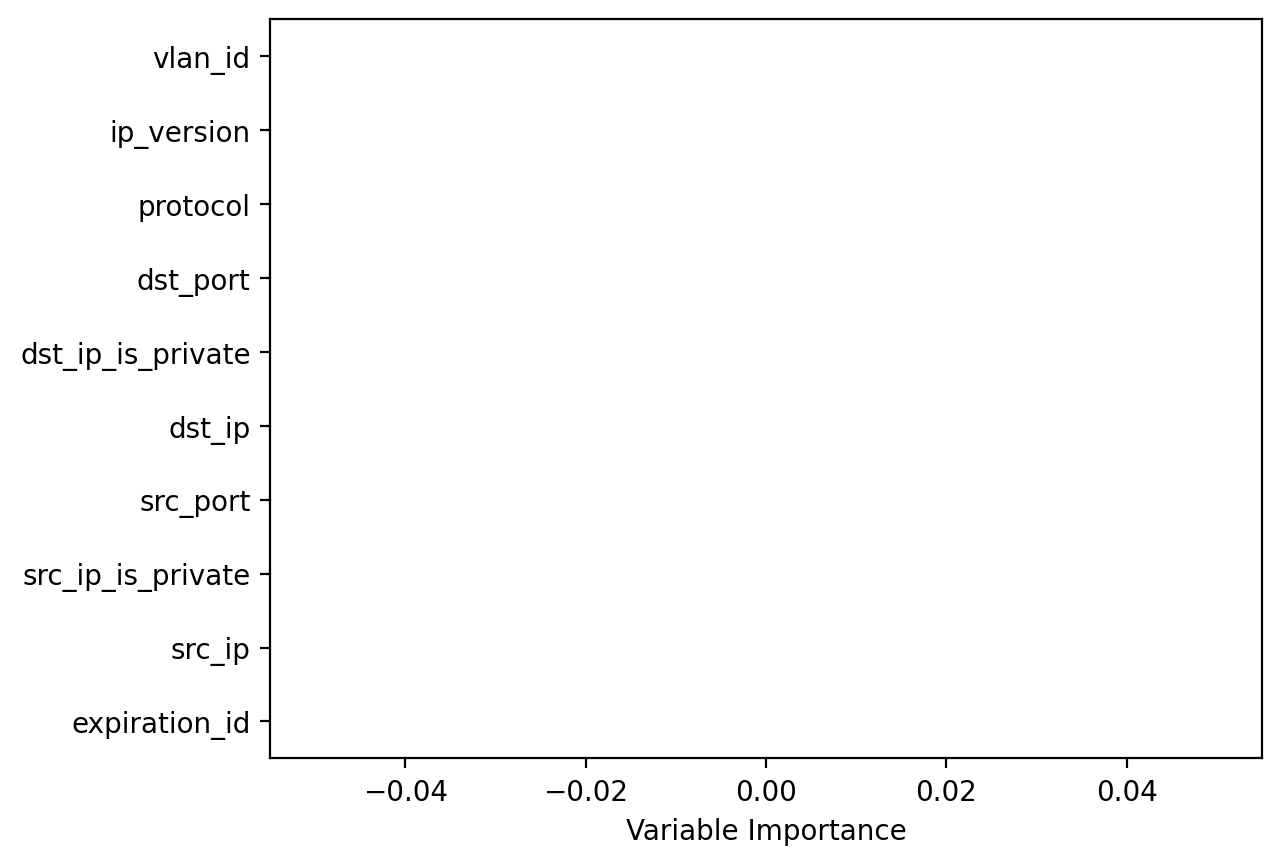

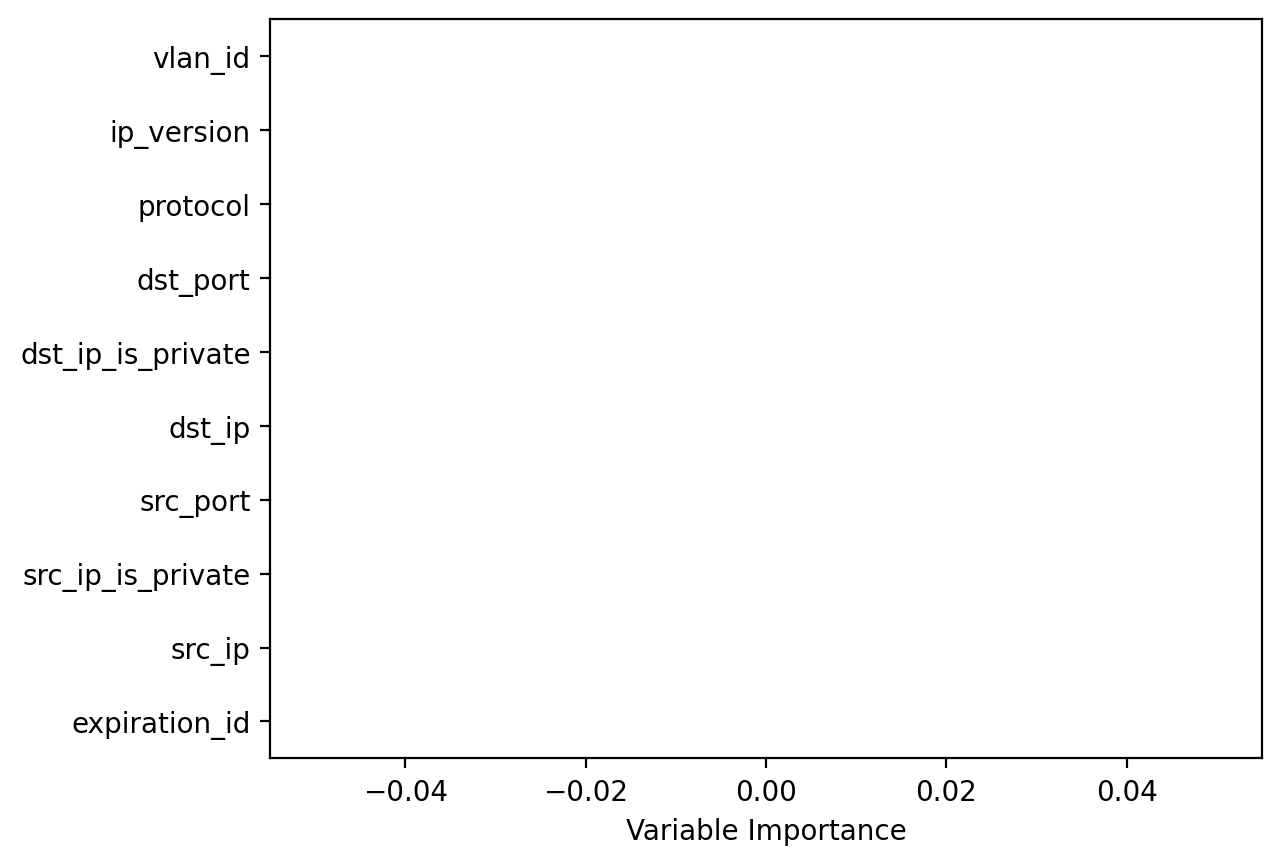

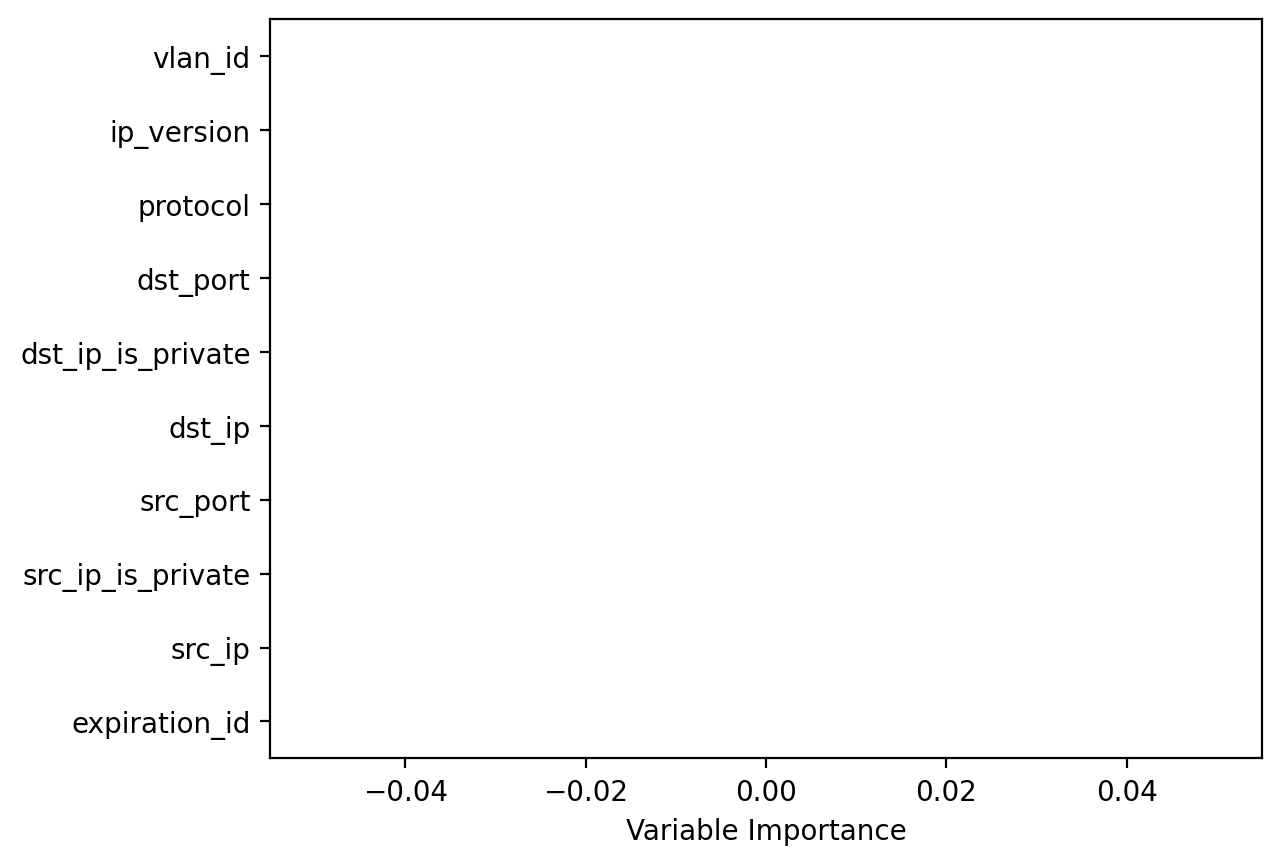

In [14]:
# XGBoost
print(xgb.__version__)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Create the Extreme GBM

start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = []
Truth = []
Output = []
 
for train, test in tqdm(splits):
    model = XGBClassifier(n_estimators=100, learning_rate = 0.1,use_label_encoder =False,verbose=None,
                    max_depth = 5, eval_metric='logloss', tree_method="gpu_hist")
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]

    a = y_test.to_numpy() # s.values (pandas<0.24)
    if (a[0] == a).all():
        continue
    
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')
    
    ##################################################
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    tqdm.write("roc_auc_score: " + str(roc_auc_score(y_test, pred_prob)))
    
    # calculate the fpr and tpr for all thresholds of the classification
    #fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob)
    #roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    #import matplotlib.pyplot as plt
    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([-0.05, 1])
    #plt.ylim([0, 1.05])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.show()
    ##################################################
    
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


---Run time is 5.673729081999909 seconds ---

Accuracy of each fold: 
 [0.8797796323569519, 1.0, 1.0, 1.0, 1.0]

Avg accuracy : 
0.9759559264713904

Std of accuracy : 
0.048088147057219234
[[42230  2204]
 [    0 47231]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     44434
           1       0.96      1.00      0.98     47231

    accuracy                           0.98     91665
   macro avg       0.98      0.98      0.98     91665
weighted avg       0.98      0.98      0.98     91665

0.9503983436107485
1.0
1.0
0.9745684482599464


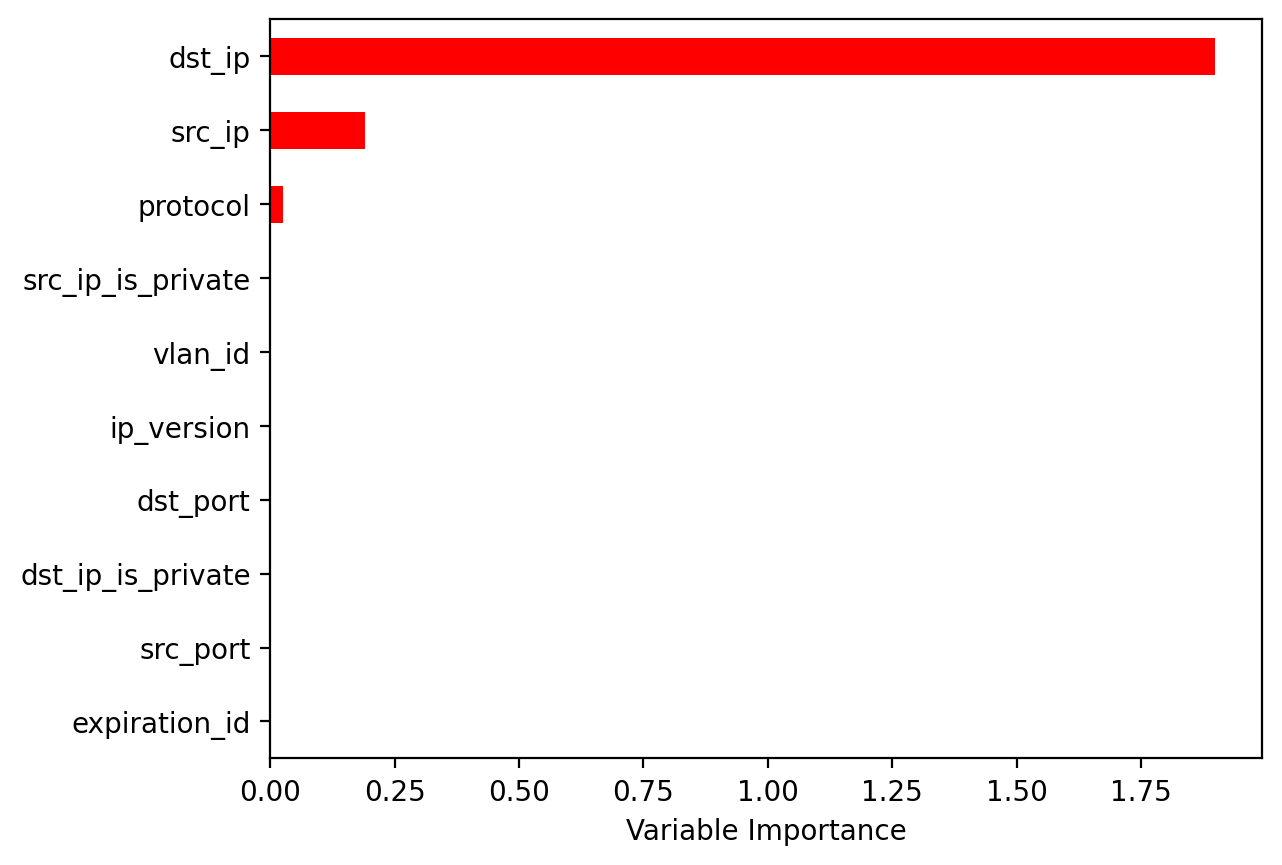

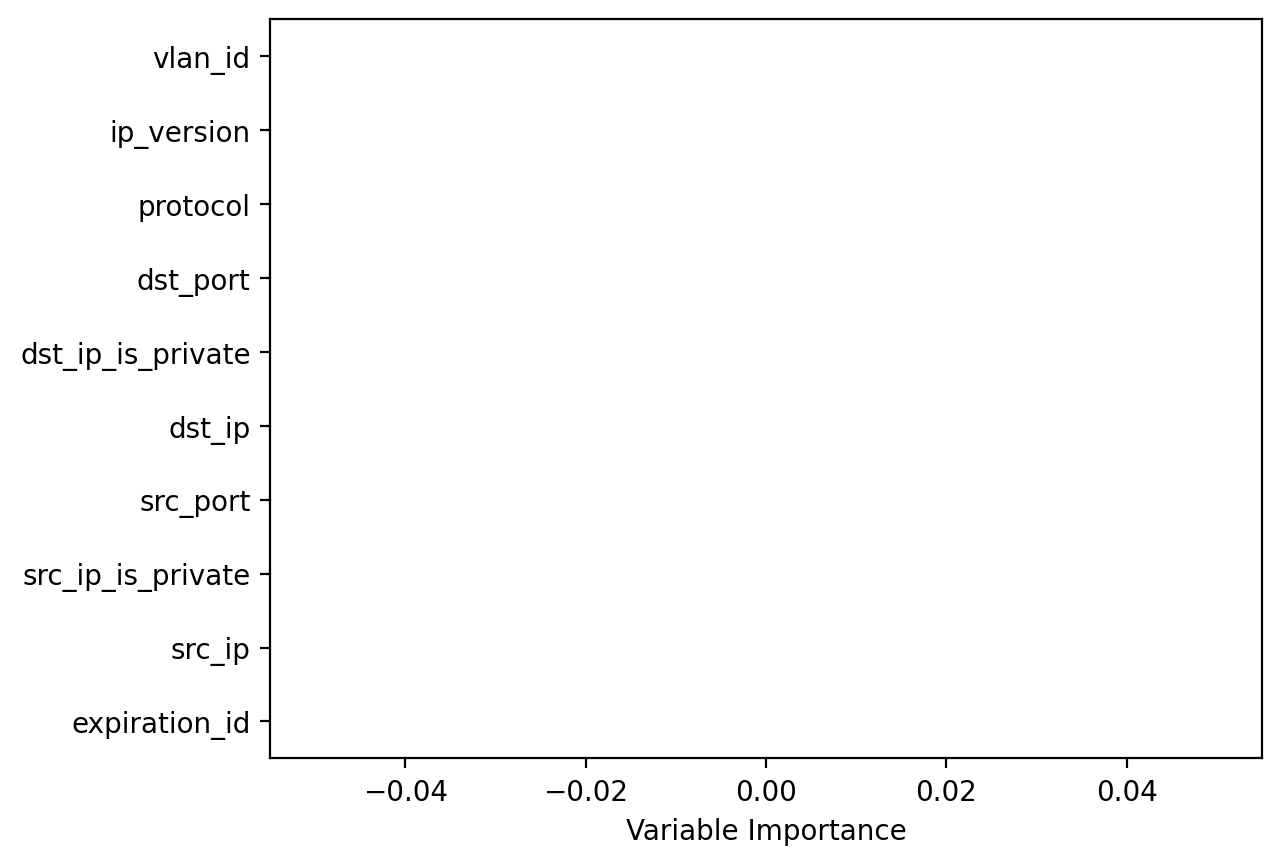

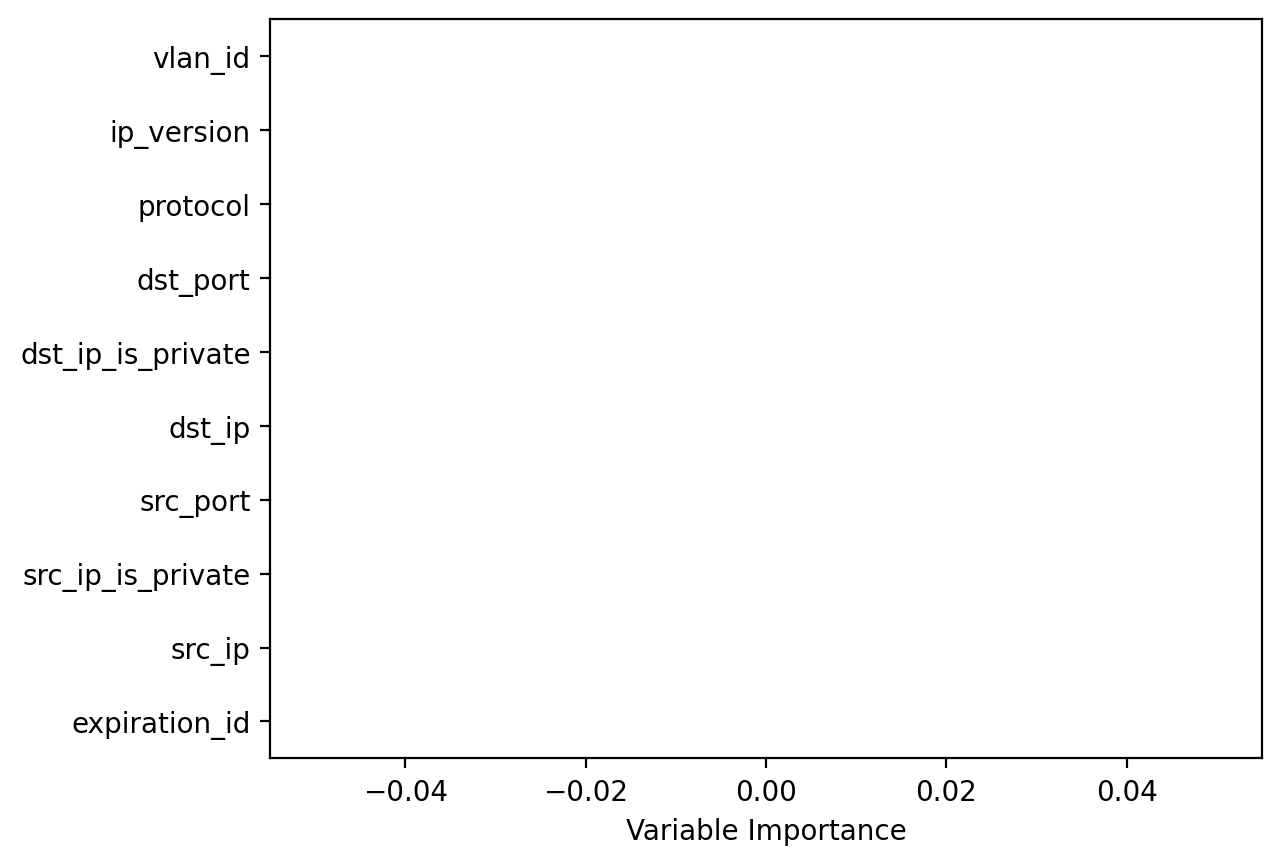

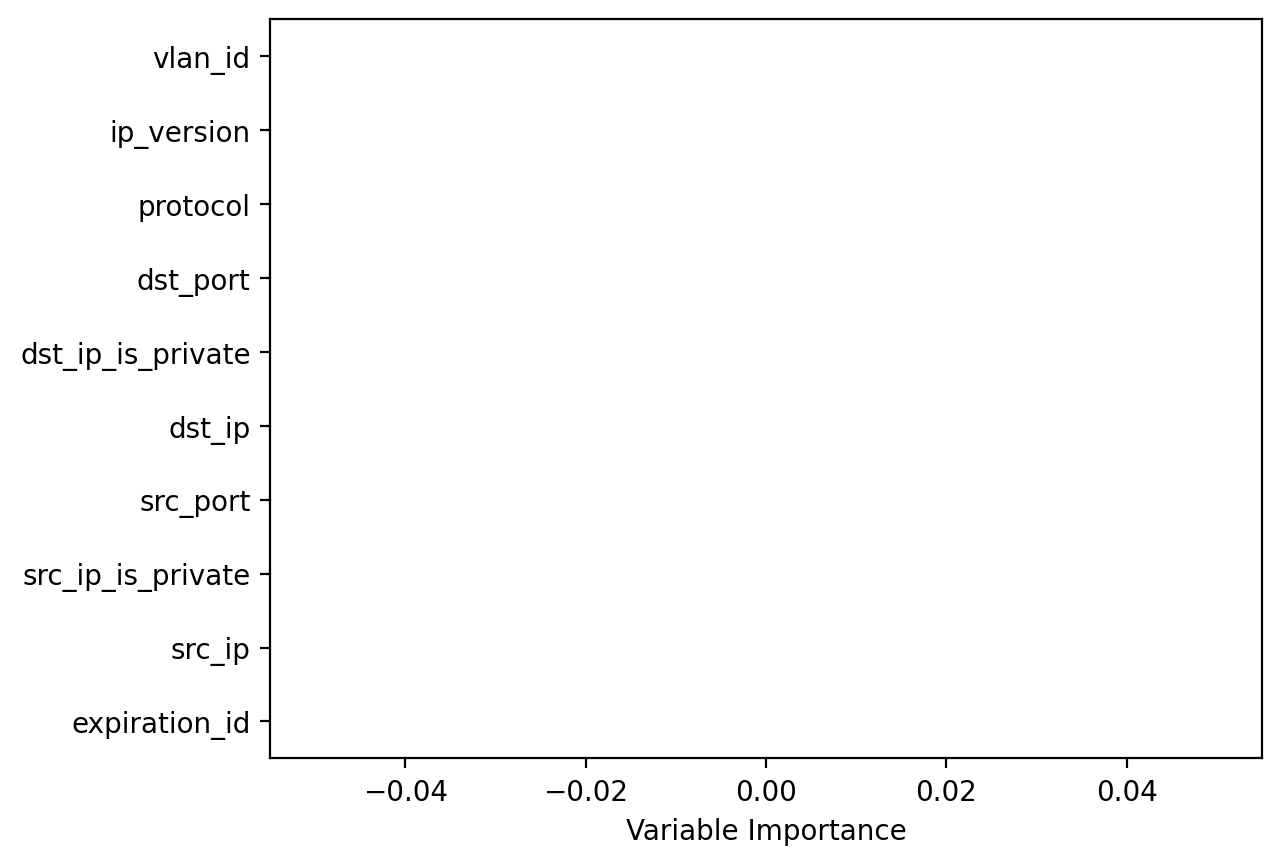

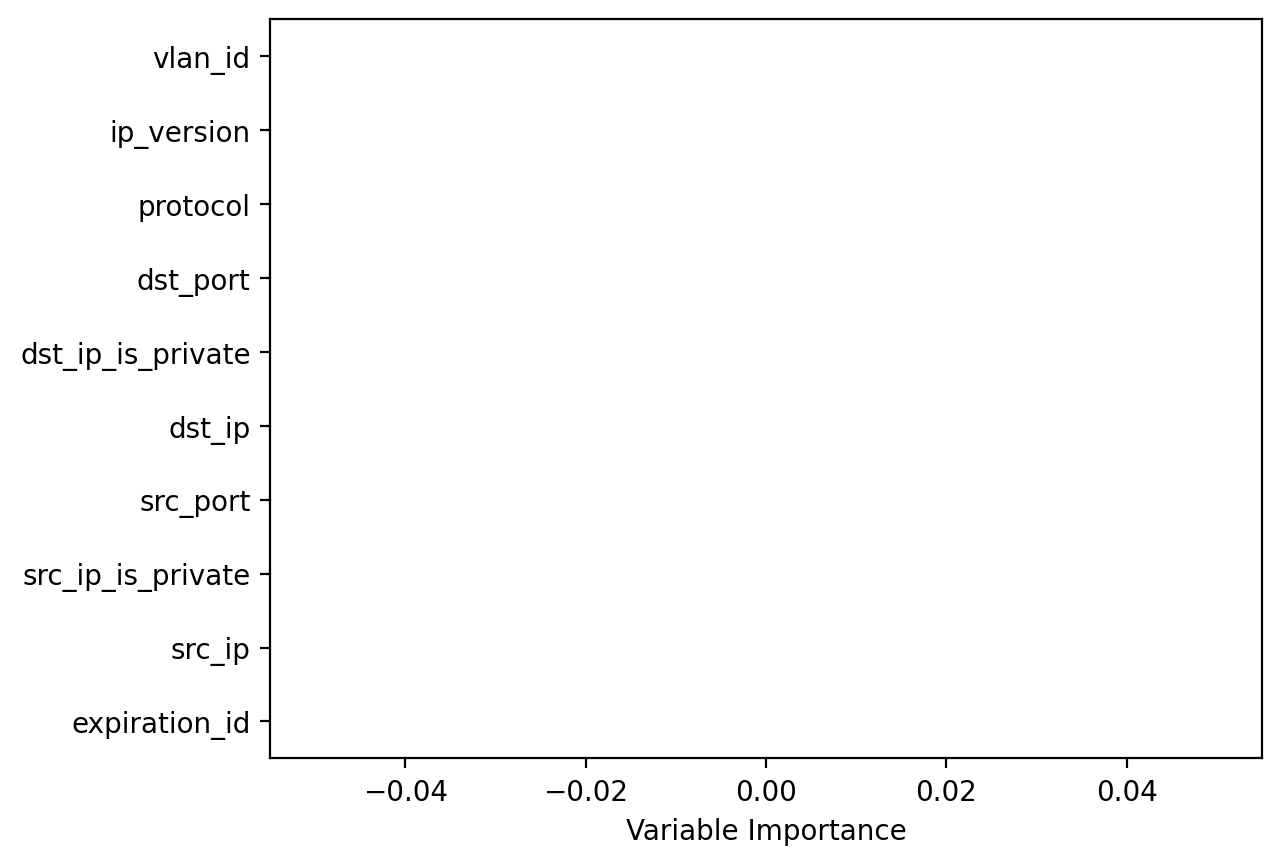

In [11]:
# LightGBM

start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = []
Truth = []
Output = []
 
for train, test in tqdm(splits):
    lgbm = lgb.LGBMClassifier(max_bin = 63,
                                num_leaves = 255,
                                num_iterations = 50,
                                learning_rate = 0.1,
                                tree_learner = "serial",
                                task = "train",
                                is_training_metric = False,
                                min_data_in_leaf = 1,
                                min_sum_hessian_in_leaf = 100,
                                ndcg_eval_at = [1,3,5,10],
                                device = "gpu",
                                gpu_platform_id = 0,
                                gpu_device_id = 0,
                                num_threads=8,
    )
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
    # Create the LightGBM data containers
    model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)], verbose=False)
          #eval_metric='logloss')

    pred_values = model.predict(X_test)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


---Run time is 3.592778271000043 seconds ---

Accuracy of each fold: 
 [0.9944908089237986, 1.0, 1.0, 1.0, 1.0]

Avg accuracy : 
0.9988981617847597

Std of accuracy : 
0.002203676430480561
[[44333   101]
 [    0 47231]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44434
           1       1.00      1.00      1.00     47231

    accuracy                           1.00     91665
   macro avg       1.00      1.00      1.00     91665
weighted avg       1.00      1.00      1.00     91665

0.9977269658369717
1.0
1.0
0.9988621897777327


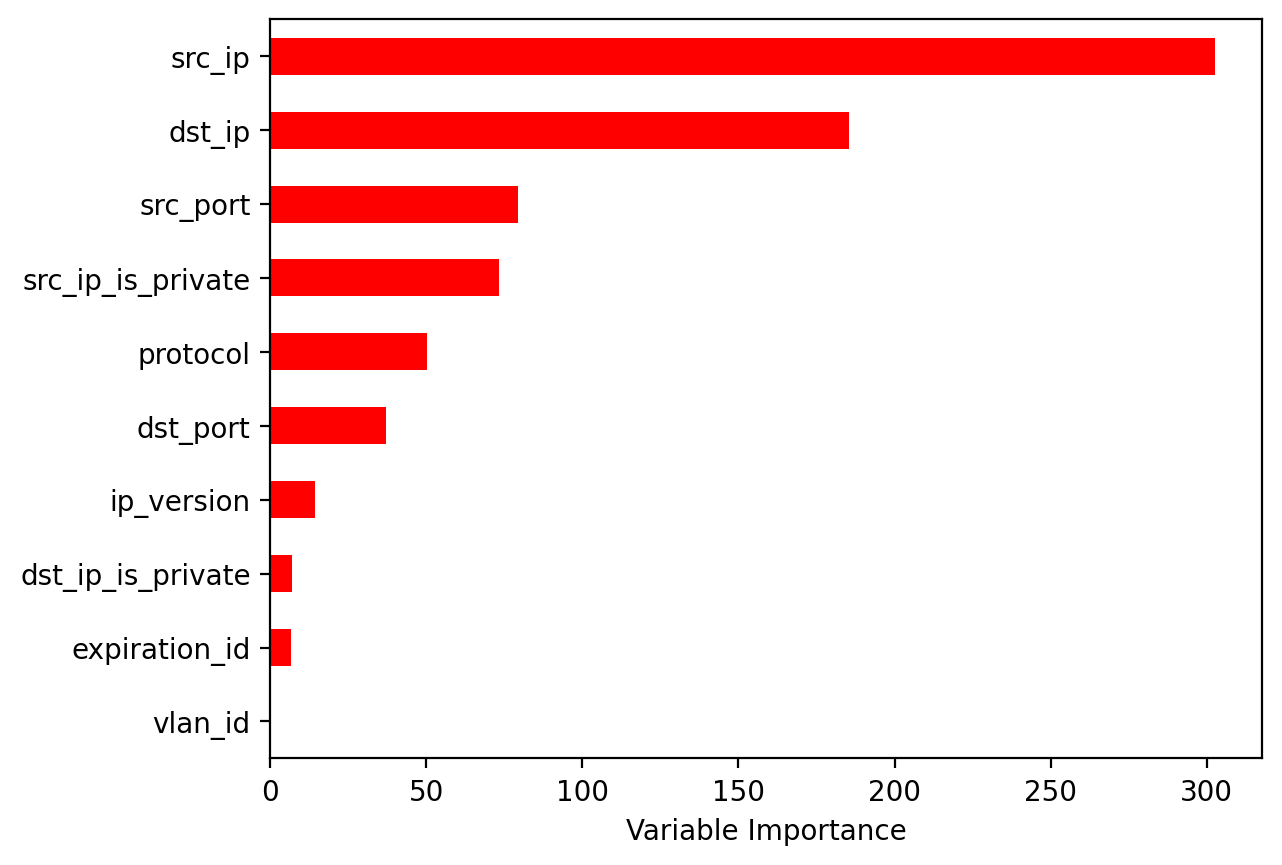

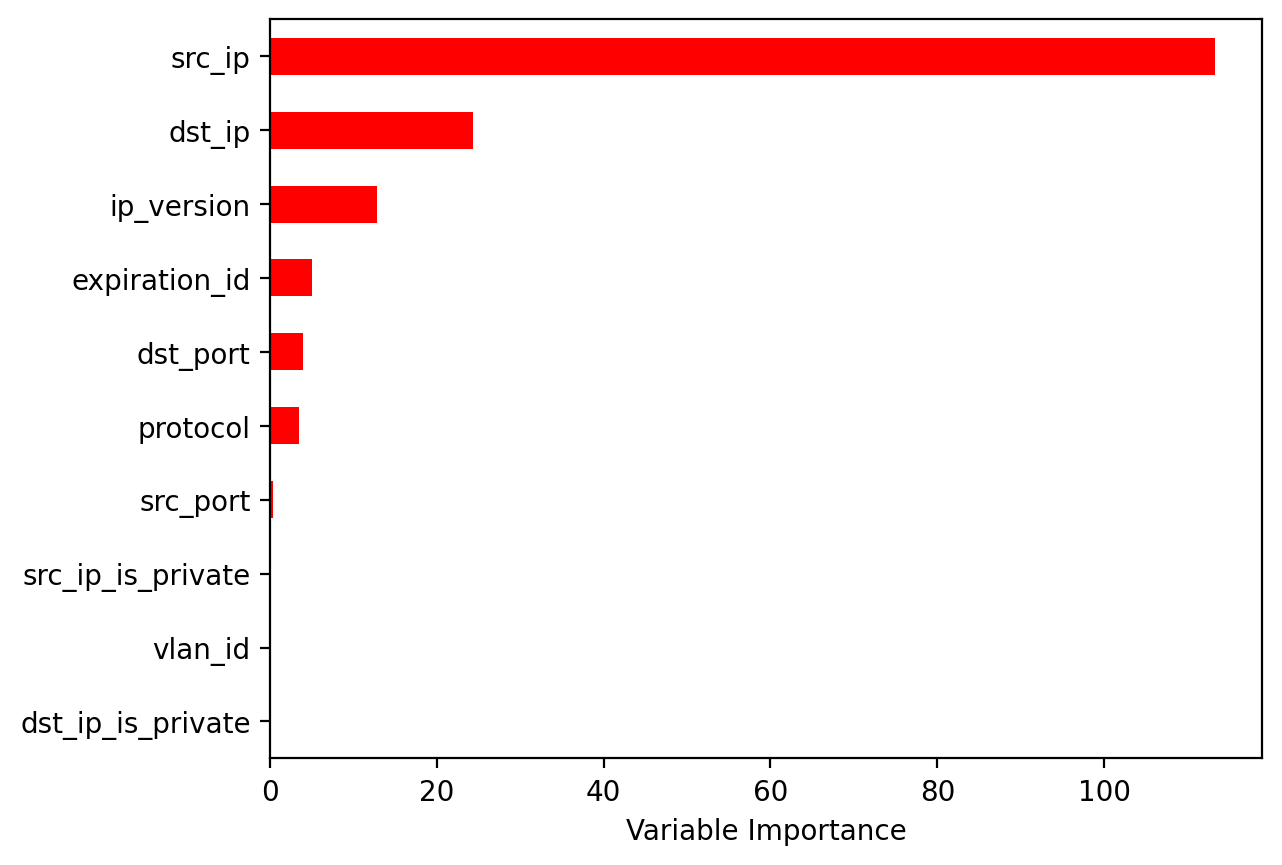

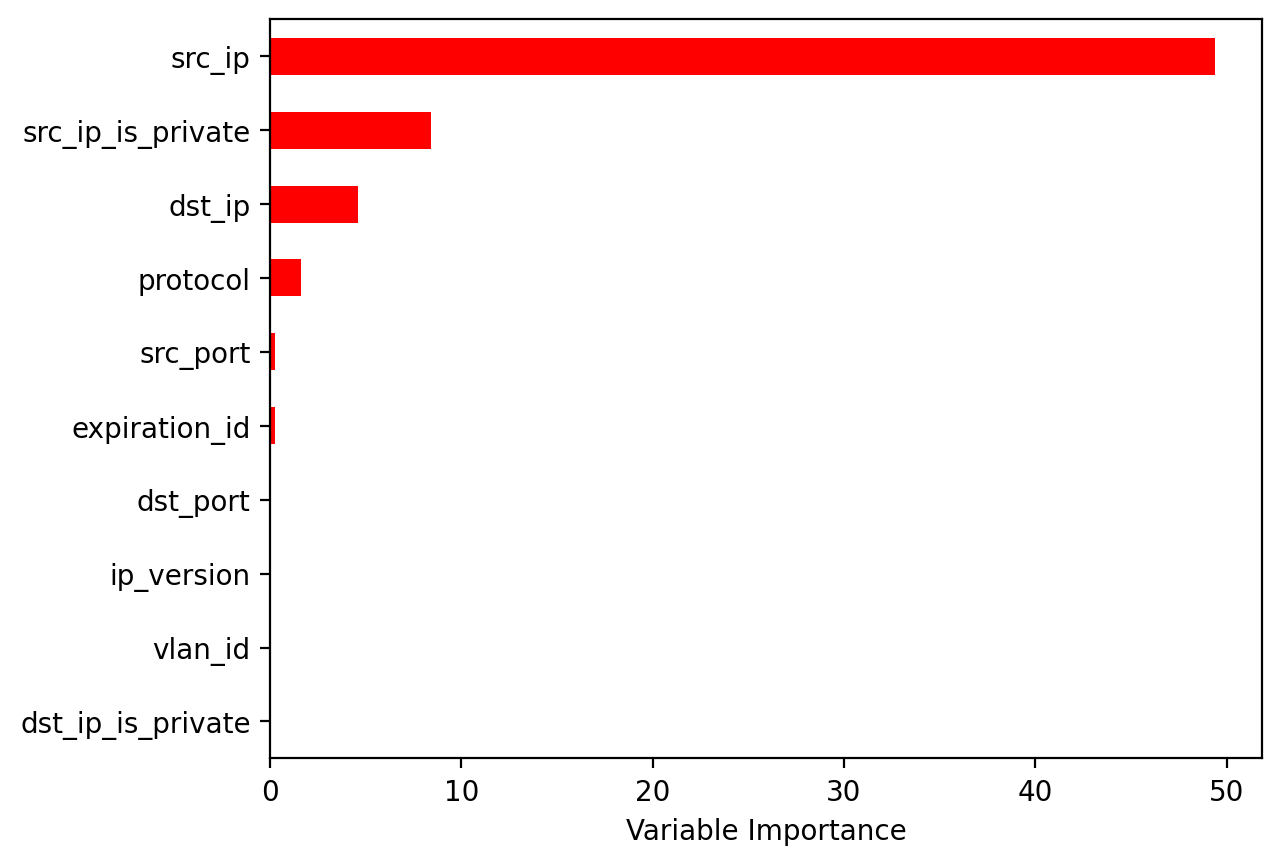

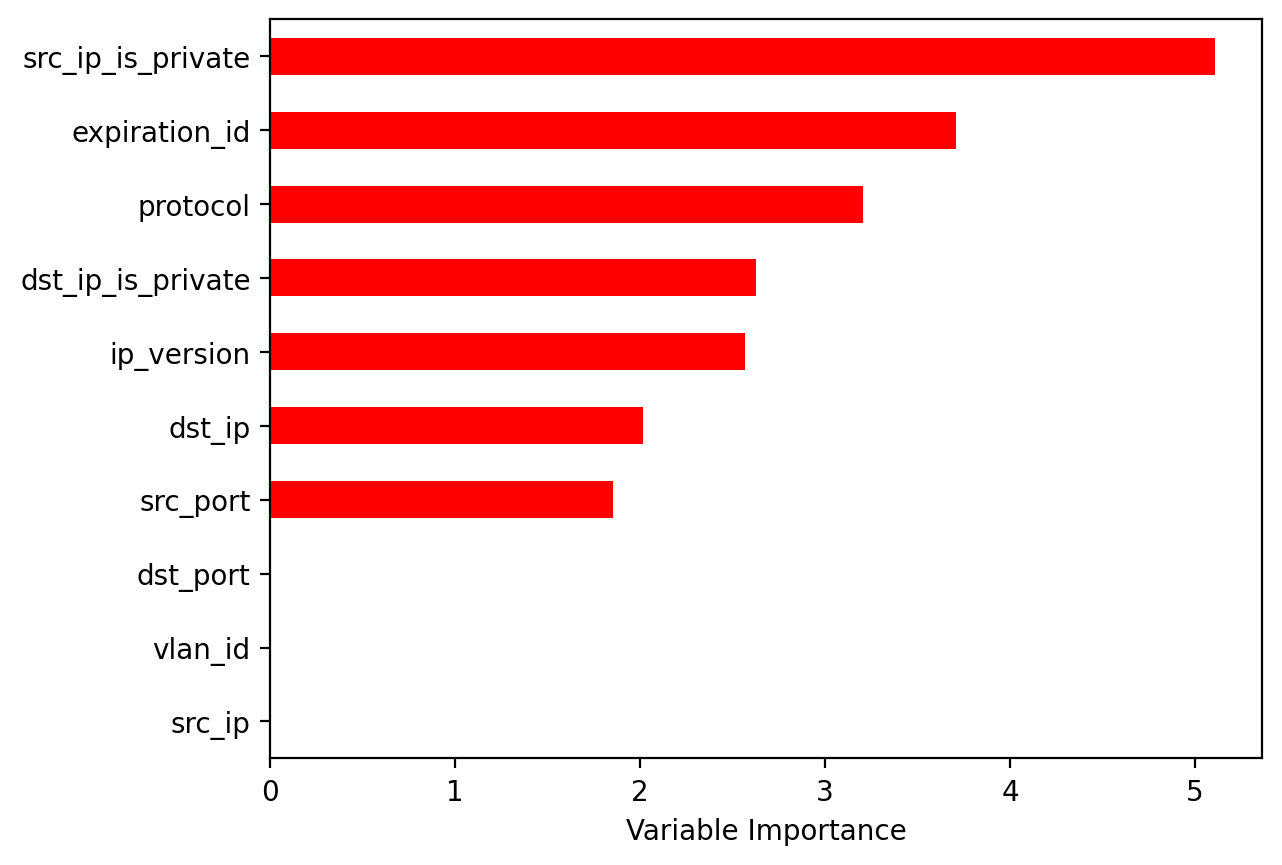

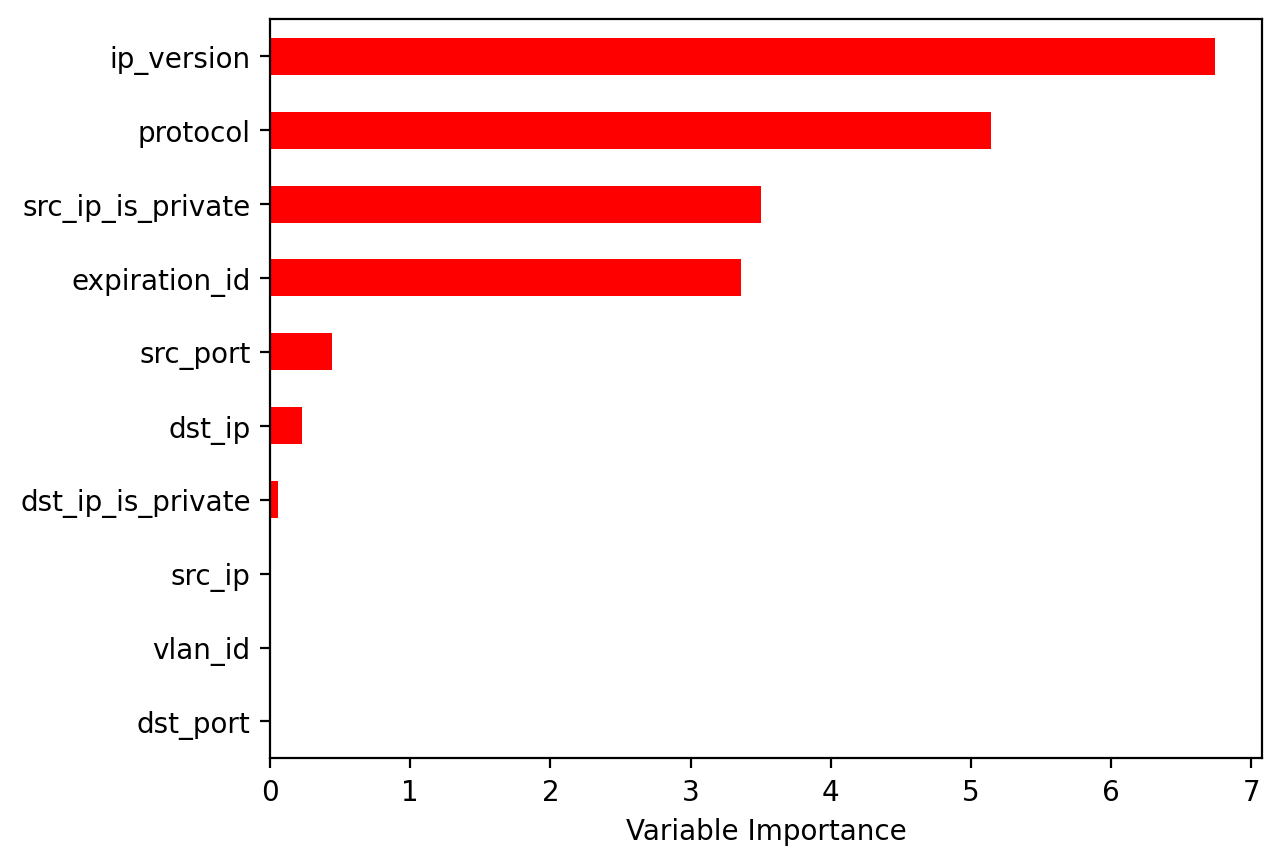

In [12]:
# CatBoost
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = []
Truth = []
Output = []
 
for train, test in tqdm(splits):
    X_train = X.iloc[train]
    y_train = y.iloc[train]

    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
    # Create CatBoost model
    model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           task_type="GPU")
    # train the model
    model.fit(X_train, y_train, verbose=False)
    
    # make the prediction using the resulting model
    pred_values = model.predict(X_test)
    #preds_proba = model.predict_proba(test_data)
    #print("class = ", preds_class)
    #print("proba = ", preds_proba)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

cm = confusion_matrix(Truth, Output)
print(cm)
print("classification report: ")
print(classification_report(Truth, Output))

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)